In [12]:
import numpy as np 
import pandas as pd
%matplotlib inline

In [13]:
df=pd.read_csv('california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [14]:
y_true=df['median_house_value']
array=np.array(df.drop(['median_house_value'],axis=1)).T
for i in range(len(array)):
    array[i]=(array[i]-np.mean(array[i]))/np.std(array[i])
x=array.T


In [15]:
def loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [16]:
def y_prediction(a,b,x):
    return np.dot(x, a) + b

In [17]:
def grad(a,b,x,y_true):
    m=len(y_true)
    y_pred=y_prediction(a,b,x)
    da=(1/m)*np.dot(x.T,(y_pred - y_true))
    db=(1/m)*np.sum(y_pred - y_true)
    return da, db

In [26]:

import matplotlib.pyplot as plt
import numpy as np

def gradient_derivative(x, y_true, epochs, learning_rate):
    m, n = x.shape
    a = np.zeros((n,))
    b = 0
    loss_mse = []

    plt.ion()
    fig, ax = plt.subplots()
    line, = ax.plot([], [], label='Loss')
    ax.set_xlim(0, epochs)
    ax.set_ylim(0, 10) 
    ax.set_xlabel('Epoch')
    ax.set_ylabel('MSE Loss')
    ax.set_title('Live Training Loss')
    ax.legend()

    for i in range(epochs):
        derivative_a, derivative_b = grad(a, b, x, y_true)
        a -= learning_rate * derivative_a
        b -= learning_rate * derivative_b
        y_pred = y_prediction(a, b, x)
        mse = loss(y_true, y_pred)
        loss_mse.append(mse)
        #if i % 100 == 0:
            #print(f"Epoch {i}: Loss = {mse:.4f}")

        if i % 100 == 0:
            line.set_data(range(len(loss_mse)), loss_mse)
            ax.set_xlim(0, i + 1)
            ax.set_ylim(0, max(loss_mse) * 1.1)
            fig.canvas.draw()
            fig.canvas.flush_events()
            plt.pause(0.001)

    plt.ioff()
    plt.show()
    print("Training Completed!")
    return a, b, loss_mse


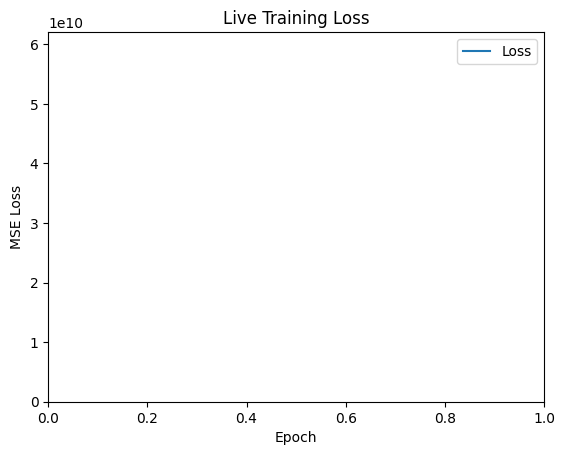

Training Completed!
The value of weights is:
        Weights
0 -43371.589790
1 -48689.042405
2  20380.086756
3  -5309.192693
4  22570.189203
5 -32466.806878
6  22627.927237
7  79219.234561
The value of constant is: 207291.50561094034


In [31]:
epochs = 100000                                                
learn_rate = 0.0001        
a,b,train_loss = gradient_derivative(x, y_true, epochs, learn_rate)
a = np.array(a)
weights = pd.DataFrame(a.reshape(-1, 1), columns=["Weights"])
print("The value of weights is:")
print(weights)
print(f"The value of constant is: {b}")

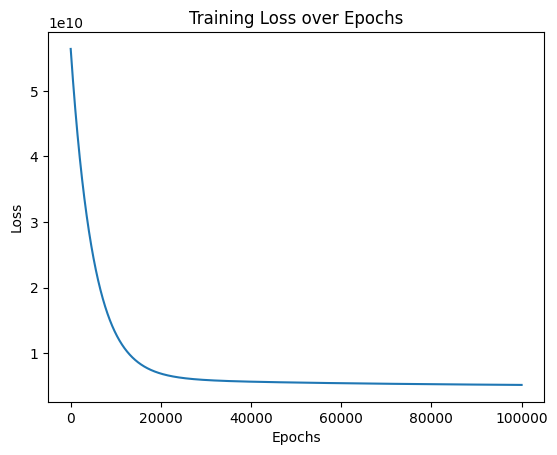

In [32]:
import matplotlib.pyplot as plt
plt.plot(train_loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()


The test loss is: 5149588394.752174


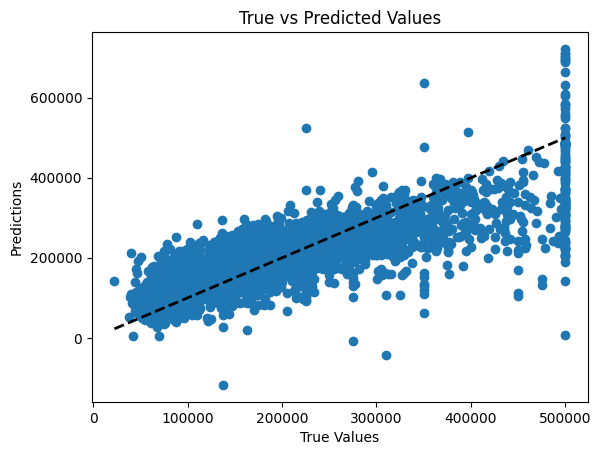

In [34]:
df1=pd.read_csv('california_housing_test.csv')
df1.head()
y_true_test=df1['median_house_value']
x_test=np.array(df1.drop(['median_house_value'],axis=1)).T
for i in range(len(x_test)):
    x_test[i]=(x_test[i]-np.mean(x_test[i]))/np.std(x_test[i])
x_test=x_test.T
y_pred_test=y_prediction(a,b,x_test)
loss_test=loss(y_true_test, y_pred_test)
print(f"The test loss is: {loss_test}")
import matplotlib.pyplot as plt
plt.scatter(y_true_test, y_pred_test)
plt.xlabel('True Values')
plt.ylabel('Predictions')   
plt.title('True vs Predicted Values')
plt.plot([y_true_test.min(), y_true_test.max()], [y_true_test.min(), y_true_test.max()], 'k--', lw=2)
plt.show()
